# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.151167e+01     6.160231e+00
 * time: 0.005407094955444336
     1     2.995022e+01     5.398135e+00
 * time: 0.015168190002441406
     2     2.302286e+01     6.709508e+00
 * time: 0.03907203674316406
     3     1.534077e+01     2.572898e+00
 * time: 0.06662702560424805
     4     1.265027e+01     1.080672e+00
 * time: 0.08953118324279785
     5     1.263656e+01     2.046412e+00
 * time: 0.11181807518005371
     6     1.144801e+01     1.788458e+00
 * time: 0.13286805152893066
     7     1.099220e+01     1.568630e+00
 * time: 0.15348100662231445
     8     1.067294e+01     1.836753e+00
 * time: 0.17402100563049316
     9     1.036481e+01     1.011386e+00
 * time: 0.19440412521362305
    10     1.032999e+01     1.350598e+00
 * time: 0.21086502075195312
    11     1.026309e+01     1.033464e+00
 * time: 0.22575616836547852
    12     1.016929e+01     6.423110e-01
 * time: 0.24512600898742676
    13     1.004404e+01     4.954056e-01
 * tim

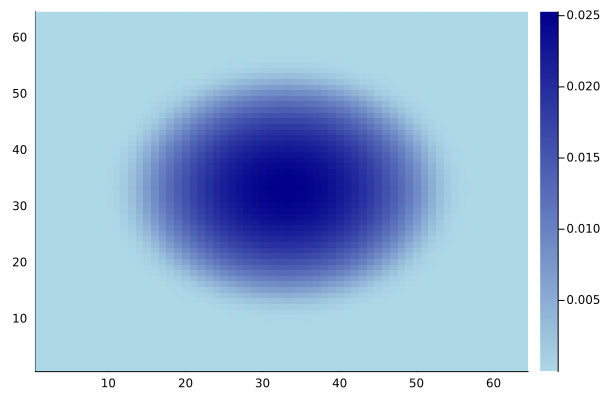

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)